**Deep Learning with Keras and Tensorflow**

**DESCRIPTION**

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


**Objective:** Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

**Domain:** Finance


In [68]:
# import the needed libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [69]:
# Load the dataset 
loan_df = pd.read_csv('loan_data.csv')

In [70]:
# check a few rows of the dataset
loan_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# EDA 
loan_df.shape

(307511, 122)

In [72]:
loan_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [73]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [74]:
loan_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [76]:
# Check null values in the dataset
loan_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [77]:
null_counts = loan_df.isnull().sum().to_frame('nulls')

In [78]:
null_counts.sort_values(by='nulls', ascending=False,inplace=True)
null_counts = null_counts.reset_index()
null_counts.head(40)

,index,nulls
0,COMMONAREA_MEDI,214865
1,COMMONAREA_AVG,214865
2,COMMONAREA_MODE,214865
3,NONLIVINGAPARTMENTS_MODE,213514
4,NONLIVINGAPARTMENTS_AVG,213514
5,NONLIVINGAPARTMENTS_MEDI,213514
6,FONDKAPREMONT_MODE,210295
7,LIVINGAPARTMENTS_MODE,210199
8,LIVINGAPARTMENTS_AVG,210199
9,LIVINGAPARTMENTS_MEDI,210199


In [79]:
col = null_counts['index'].head(40)
col

0              COMMONAREA_MEDI
1               COMMONAREA_AVG
2              COMMONAREA_MODE
3     NONLIVINGAPARTMENTS_MODE
4      NONLIVINGAPARTMENTS_AVG
5     NONLIVINGAPARTMENTS_MEDI
6           FONDKAPREMONT_MODE
7        LIVINGAPARTMENTS_MODE
8         LIVINGAPARTMENTS_AVG
9        LIVINGAPARTMENTS_MEDI
10               FLOORSMIN_AVG
11              FLOORSMIN_MODE
12              FLOORSMIN_MEDI
13            YEARS_BUILD_MEDI
14            YEARS_BUILD_MODE
15             YEARS_BUILD_AVG
16                 OWN_CAR_AGE
17               LANDAREA_MEDI
18               LANDAREA_MODE
19                LANDAREA_AVG
20           BASEMENTAREA_MEDI
21            BASEMENTAREA_AVG
22           BASEMENTAREA_MODE
23                EXT_SOURCE_1
24          NONLIVINGAREA_MODE
25           NONLIVINGAREA_AVG
26          NONLIVINGAREA_MEDI
27              ELEVATORS_MEDI
28               ELEVATORS_AVG
29              ELEVATORS_MODE
30          WALLSMATERIAL_MODE
31             APARTMENTS_MEDI
32      

In [80]:
# drop the columns with more than 50% of missing data
loan_df = loan_df.drop(col,axis=1)

In [81]:
loan_df.shape

(307511, 82)

In [82]:
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
loan_df.isnull().sum().sum()

1770363

In [84]:
# check if there's a missing value in the TARGET column
loan_df.TARGET.isna().sum()

0

In [85]:
# percentage of default to payer of the dataset for the TARGET column
loan_df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<AxesSubplot:title={'center':'Percentage of the imbalanced data'}, ylabel='TARGET'>

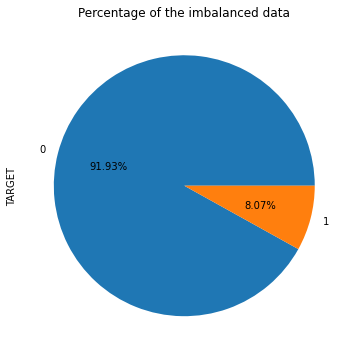

In [86]:
# Plot the imbalanced data
loan_df.TARGET.value_counts().plot(kind='pie',autopct='%1.2f%%', title='Percentage of the imbalanced data',figsize=(6,6))

In [87]:
# split the dependent and independent value
X=loan_df.drop(['TARGET','SK_ID_CURR'],axis=1)
y=loan_df['TARGET']

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NAME_CONTRACT_TYPE            307511 non-null  object 
 1   CODE_GENDER                   307511 non-null  object 
 2   FLAG_OWN_CAR                  307511 non-null  object 
 3   FLAG_OWN_REALTY               307511 non-null  object 
 4   CNT_CHILDREN                  307511 non-null  int64  
 5   AMT_INCOME_TOTAL              307511 non-null  float64
 6   AMT_CREDIT                    307511 non-null  float64
 7   AMT_ANNUITY                   307499 non-null  float64
 8   AMT_GOODS_PRICE               307233 non-null  float64
 9   NAME_TYPE_SUITE               306219 non-null  object 
 10  NAME_INCOME_TYPE              307511 non-null  object 
 11  NAME_EDUCATION_TYPE           307511 non-null  object 
 12  NAME_FAMILY_STATUS            307511 non-nul

In [89]:
column_float = X.select_dtypes('float').columns
column_float

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [90]:
column_int = X.select_dtypes('int64').columns
column_to_process = column_int.append(column_float)

In [91]:
# float64(27), int64(40)
len(column_to_process)

66

In [92]:
column_to_process

Index(['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION

In [93]:
X[column_to_process].head()

,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,-9461,-637,-2120,1,1,0,1,1,0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,-16765,-1188,-291,1,1,0,1,1,0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-19046,-225,-2531,1,1,1,1,1,0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-19005,-3039,-2437,1,1,0,1,0,0,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,-19932,-3038,-3458,1,1,0,1,0,0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# imputation of the missing data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X[column_to_process] = imp_mean.fit_transform(X[column_to_process])

In [95]:
X[column_to_process].isnull().sum().sum()

0

In [96]:
X.shape

(307511, 80)

In [97]:
column_object = X.select_dtypes('object').columns
column_object

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [98]:
X[column_object].head(8)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN


In [99]:
X[column_object].isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
HOUSETYPE_MODE                154297
EMERGENCYSTATE_MODE           145755
dtype: int64

In [100]:
X['EMERGENCYSTATE_MODE'].value_counts(dropna=False,normalize=True)*100

No     51.844649
NaN    47.398304
Yes     0.757046
Name: EMERGENCYSTATE_MODE, dtype: float64

In [101]:
X['HOUSETYPE_MODE'].value_counts(dropna=False, normalize=True)*100

NaN                 50.176091
block of flats      48.942314
specific housing     0.487462
terraced house       0.394132
Name: HOUSETYPE_MODE, dtype: float64

In [102]:
# drop the columns with more than 45% of missing data
X.drop(['EMERGENCYSTATE_MODE','HOUSETYPE_MODE'],axis=1,inplace=True)
X.shape

(307511, 78)

In [103]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [104]:
# filling 'NAME_TYPE_SUITE' & 'OCCUPATION_TYPE' the only columns with null value with most common class
X = X.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [105]:
column_object = X.select_dtypes('object').columns
X[column_object].isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [106]:
# Encode the categorical columns that is required for the model
enc = OrdinalEncoder()
enc.fit(X[column_object])
X[column_object] = enc.transform(X[column_object])

In [107]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,6.0,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NAME_CONTRACT_TYPE            307511 non-null  float64
 1   CODE_GENDER                   307511 non-null  float64
 2   FLAG_OWN_CAR                  307511 non-null  float64
 3   FLAG_OWN_REALTY               307511 non-null  float64
 4   CNT_CHILDREN                  307511 non-null  float64
 5   AMT_INCOME_TOTAL              307511 non-null  float64
 6   AMT_CREDIT                    307511 non-null  float64
 7   AMT_ANNUITY                   307511 non-null  float64
 8   AMT_GOODS_PRICE               307511 non-null  float64
 9   NAME_TYPE_SUITE               307511 non-null  float64
 10  NAME_INCOME_TYPE              307511 non-null  float64
 11  NAME_EDUCATION_TYPE           307511 non-null  float64
 12  NAME_FAMILY_STATUS            307511 non-nul

In [109]:
#%pip install imbalanced-learn

In [110]:
# perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [111]:
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 189399, 1: 16633})


In [112]:
# Balance the dataset using SMOTE technique
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [113]:
counter = Counter(y_train)
print(counter)

Counter({0: 189399, 1: 189399})


<AxesSubplot:title={'center':'Percentage of the imbalanced data'}, ylabel='TARGET'>

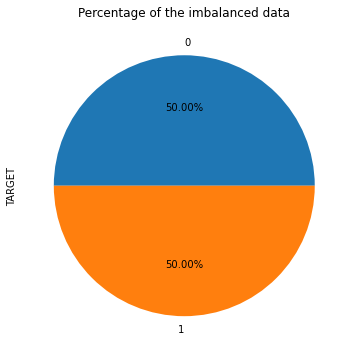

In [114]:
# Plot the imbalanced data
y_train.value_counts().plot(kind='pie',autopct='%1.2f%%', title='Percentage of the imbalanced data',figsize=(6,6))

In [121]:
# Build the Graph
# Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((78,),input_shape=(78,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [122]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

In [123]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [124]:
#Compile the model and calculate area under curve and Sensitivity as a metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC',tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [125]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 78)                0         
                                                                 
 batch_normalization_12 (Bat  (None, 78)               312       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 200)               15800     
                                                                 
 batch_normalization_13 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 200)              

In [126]:
# Train the model
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=15,
          batch_size=32)

Epoch 1/15
11838/11838 [==============================] - 79s 5ms/step - loss: 0.4383 - accuracy: 0.7921 - auc: 0.8745 - specificity_at_sensitivity_4: 0.9685 - val_loss: 0.2751 - val_accuracy: 0.9128 - val_auc: 0.7125 - val_specificity_at_sensitivity_4: 0.7856
Epoch 2/15
11838/11838 [==============================] - 60s 5ms/step - loss: 0.3535 - accuracy: 0.8402 - auc: 0.9152 - specificity_at_sensitivity_4: 0.9970 - val_loss: 0.2732 - val_accuracy: 0.9157 - val_auc: 0.7218 - val_specificity_at_sensitivity_4: 0.7948
Epoch 3/15
11838/11838 [==============================] - 59s 5ms/step - loss: 0.3295 - accuracy: 0.8537 - auc: 0.9244 - specificity_at_sensitivity_4: 0.9989 - val_loss: 0.2656 - val_accuracy: 0.9177 - val_auc: 0.7254 - val_specificity_at_sensitivity_4: 0.7911
Epoch 4/15
11838/11838 [==============================] - 59s 5ms/step - loss: 0.3177 - accuracy: 0.8601 - auc: 0.9289 - specificity_at_sensitivity_4: 0.9993 - val_loss: 0.2734 - val_accuracy: 0.9161 - val_auc: 0.7202